This notebook is to document the implementation of cold deciduous only vegetation in FATES.

The runs here use two identical PFTs cloned from the "broadleaf_colddecid_extratrop_tree" in the default FATES file. (PFT#6) 

I noticed previously that there were some odd issues with this PFT dominating the tropical regions, and so wanted to see how they would behave in the absence of any competitors... The answer, as usual for these sorts of things was 'interesting'. 

Hopefully this little story should at least point to a plausible set of solutions, (spoiler alert: I haven't figured it out yet.) 

So, in the beginning, we have some magic python libraries...

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Then we choose which simulations to use...

In [2]:
runs = ['clm5-fates_napi5_CLD','clm5-fates_napi5_CLD_dailyout','clm5-fates_ryanfix_CLD']

Then we make an ugly list of variables to ignore (the files being large)

(n.b. does anyone know how to make this inclusive rather than exclusive? 
Reading in >10 years of 4x5 output takes nearly forever)

In [3]:
drop={'ACTUAL_IMMOB','ATM_TOPO','BCDEP','BTRAN','CBALANCE_ERROR_BGC','CBALANCE_ERROR_ED','CBALANCE_ERROR_TOTAL',
      'CWD_STOCK_COL','C_LBLAYER','C_STOMATA','DENIT','DSL','DSTDEP','DSTFLXT','EFLXBUILD','EFLX_DYNBAL',
      'EFLX_GRND_LAKE','EFLX_LH_TOT','EFLX_LH_TOT_R','EFLXBUILD','EFLX_DYNBAL','EFLX_GRND_LAKE','EFLX_LH_TOT',
      'EFLX_LH_TOT_R','ERRH2O','ERRH2OSNO','ERRSEB','ERRSOI','FCEV','FCOV','FCTR','FFIX_TO_SMINN','FGEV','FGR',
      'FGR12','FH2OSFC','FIRA','FIRA_R','FIRE','FSA','FSAT','FSDS','FSDSND','FSDSNDLN','FSDSNI','FSDSVD','FSDSVDLN',
      'FSDSVI','FSDSVILN','FSH','FSH_PRECIP_CONVERSION','FSH_G','FSH_R','FSH_RUNOFF_ICE_TO_LIQ','FSH_TO_COUPLER',
      'FSH_V','FSM','FSNO','FSNO_EFF','FSR','FSRND','FSRNDLN','FSRNI','FSRVD','FSRVDLN','FSRVI','GROSS_NMIN','H2OCAN',
      'H2OSNO_TOP','HEAT_CONTENT1','HEAT_FROM_AC','HIA','HIA_R','HIA_U','HUMIDEX','HUMIDEX_R','HUMIDEX_U',
      'ICE_CONTENT1','LAKEICEFRAC_SURF','LAKEICETHICK','LIQUID_CONTENT1','LITR1N','LITR1N_vr','LITR2N','LITR2N_vr',
      'LITR3N','LITR3N_vr','NDEP_TO_SMINN','NET_NMIN','O_SCALAR','PARVEGLN','PBOT','PCT_GLC_MEC','POTENTIAL_IMMOB',
      'QCHARGE','QDRAI','QDRAI_PERCH','QDRAI_XS','QDRIP','QFLOOD','QFLOOD','QFLX_DEW_GRND','QFLX_DEW_SNOW',
      'QFLX_EVAP_TOT','QFLX_ICE_DYNBAL','QFLX_LIQ_DYNBAL','QFLX_SNOW_DRAIN','QFLX_SNOW_DRAIN_ICE','QFLX_SUB_SNOW',
      'QH2OSFC','QICE','QICE_FRZ','QICE_MELT','QINFL','QINTR','QIRRIG','QOVER','QRGWL','QRUNOFF','QRUNOFF_ICE',
      'QRUNOFF_TO_COUPLER','QSNOCPLIQ','QSNOFRZ','QSNOFRZ_ICE','QSNOMELT','QSNOMELT_ICE','QSNO_TEMPUNLOAD',
      'QSNO_WINDUNLOAD','QSNWCPICE', 'QSOIL_ICE','SABG_PEN','SABV','SMINN','SMINN_LEACHED','SMINN_TO_PLANT',
      'SNOBCMCL','SNOBCMSL','SNOCAN','SNODSTMCL','SNODSTMSL','SNOFSRND','SNOFSRND','SNOFSRVD','SNOFSRVI',
      'SNOINTABS','SNOOCMCL','SNOOCMSL','SNOTXMASS','SNOUNLOAD','SNOW_PERSISTENCE','SNOW_SINKS','SNOW_SOURCES',
      'SOIL1N','SOIL1N_vr','SOIL2N','SOIL2N_vr','SOIL3N','SOIL3N_vr','SOILC_HR','SOILICE','SOILLIQ','SOILRESIS',
      'SOILWATER_10CM','SOM_C_LEACHED','SUPPLEMENT_TO_SMINN','SWBGT','SWBGT_U','TAUX','TAUY','TKE1','TLAKE',
      'TREFMNAV','TREFMXAV','TSOI_ICE','T_SCALAR','U10','U10_DUST','URBAN_AC','URBAN_HEAT','VOLR','VOLRMCH',
      'WASTEHEAT','WBT','WBT_R','WBT_U','W_SCALAR','ZBOT','ZWT','ZWT_PERCH'}

Read data from the archive: (but only the first couple of years for the sake of the aforementioned slowness)

In [4]:
run = runs[0]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' 
#arc = scratch + '/' + run + '/run/' + run + '.clm2.h0.' 
print(arc)
ds8 = xr.open_mfdataset(arc + '2002*', drop_variables=drop, decode_times=False)
#ds_2003 = xr.open_mfdataset(arc + '2003*', drop_variables=drop, decode_times=False)

/glade/scratch/rfisher/archive/clm5-fates_napi5_CLD/lnd/hist/clm5-fates_napi5_CLD.clm2.h0.


Then we plot a timeseries of the LAI of all global points

Text(0.5, 1.0, '')

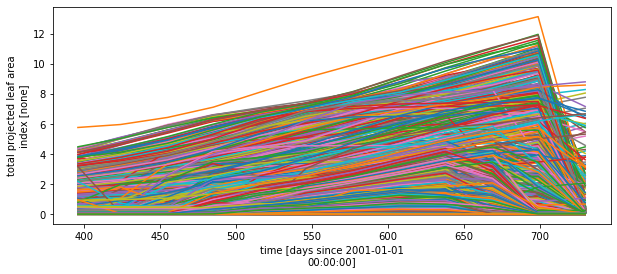

In [5]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(5, 40)
lons=range(1, 72)
for l in lats:
   ds8.TLAI.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)
plt.title('')

(0, 0.2)

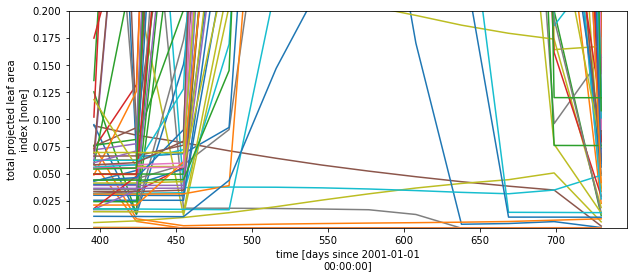

In [6]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(30,33)
lons=range(1, 72)
for l in lats:
   ds8.TLAI.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)
plt.title('')
plt.ylim(0,0.2)

So far, so deciduous looking (in general)... Let's plot a map of phenology status in the last July of the run.

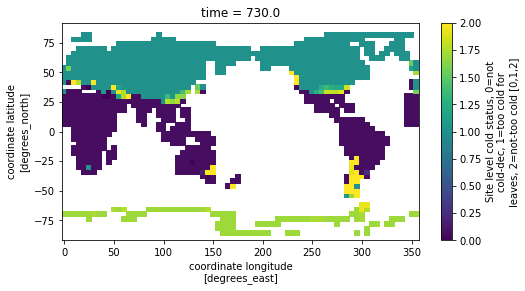

In [7]:
plt.rcParams['figure.figsize'] = [8, 4]
t=ds8.SITE_COLD_STATUS.sizes['time']-1
x = ds8.SITE_COLD_STATUS[t,:,:]
x.plot()

From this, the tropics are mostly in '0' state, which means they are 'nevercold' and shouldn't have any leaves on, right? (2 is 'not_cold', 1 is 'is_cold')


https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L741

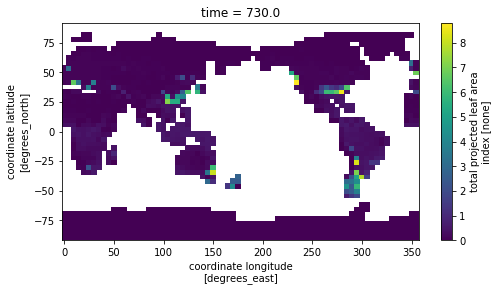

In [8]:
plt.rcParams['figure.figsize'] = [8, 4]
t=ds8.TLAI.sizes['time']-1
x = ds8.TLAI[t,:,:]
x.plot()

Err, but actually the points that should be 'nevercold' do in fact look pretty leafy... 

So, how did we get there, from the beginning of the simulation? (plotting out only points in tropical band)

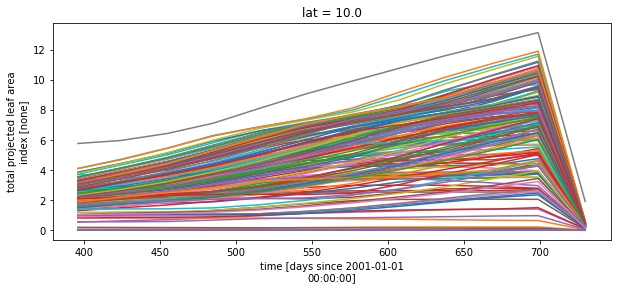

In [9]:
plt.rcParams['figure.figsize'] = [10,4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.TLAI.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)


The leaves are on at the beginning, then eventually, in the tropics, we determine that they are 'nevercold', and then they come off. Later, they creep back on again after another year or so... 

Does the phenological status of those points evolve at the same time?

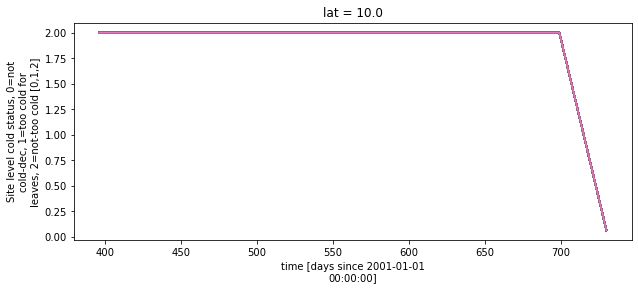

In [10]:
plt.rcParams['figure.figsize'] =[10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.SITE_COLD_STATUS.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)


No, none of these points goes back into the 'notcold' state (2). They all appear to stay in 'nevercold'

Thus, we do not seem to have actually triggered any of the climate triggers:
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L698


Just for good measure, here is the "days since cold leaf off" counter, showing that we apparently only trigger this once

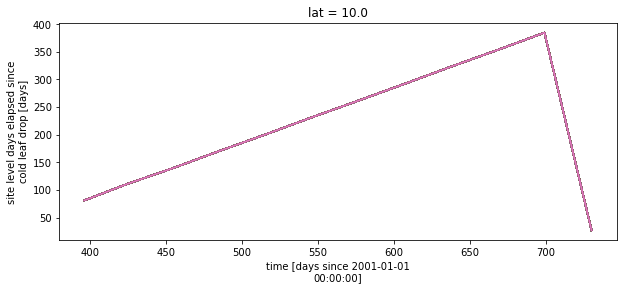

In [11]:
plt.rcParams['figure.figsize'] =[10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)


And here are "days since cold leaf on", which again, only happens once, indicating that the grid cell status is not 'officially; switching back to 'not cold'. e.g. 
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L803

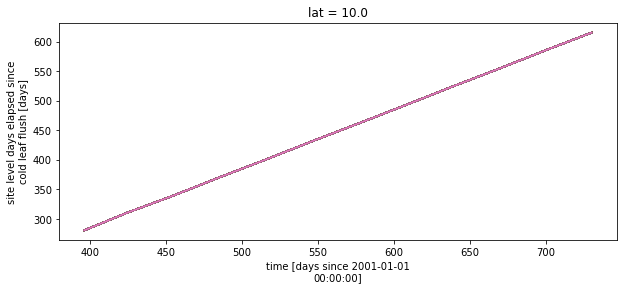

In [12]:
plt.rcParams['figure.figsize'] =[10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.SITE_DAYSINCE_COLDLEAFON.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)


Check number of chill days. 

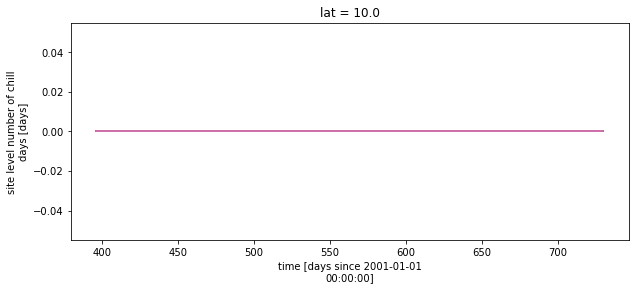

In [13]:
plt.rcParams['figure.figsize'] =[10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.SITE_NCHILLDAYS.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)


Lets double check that all the PFTs are actually cold deciduous

In [14]:
pftfile='/glade/u/home/rfisher/python_scripts/fates_cld.nc'
pfts = xr.open_dataset(pftfile)
print(pfts. fates_phen_season_decid)
print(pfts. fates_phen_stress_decid)
print(pfts. fates_phen_evergreen)
print(pfts. fates_turnover_carb_retrans)


<xarray.DataArray 'fates_phen_season_decid' (fates_pft: 2)>
array([1., 1.])
Dimensions without coordinates: fates_pft
Attributes:
    units:      logical flag
    long_name:  Binary flag for seasonal-deciduous leaf habit
<xarray.DataArray 'fates_phen_stress_decid' (fates_pft: 2)>
array([0., 0.])
Dimensions without coordinates: fates_pft
Attributes:
    units:      logical flag
    long_name:  Binary flag for stress-deciduous leaf habit
<xarray.DataArray 'fates_phen_evergreen' (fates_pft: 2)>
array([0., 0.])
Dimensions without coordinates: fates_pft
Attributes:
    units:      logical flag
    long_name:  Binary flag for evergreen leaf habit
<xarray.DataArray 'fates_turnover_carb_retrans' (fates_prt_organs: 6, fates_pft: 2)>
array([[0.025, 0.025],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ]])
Dimensions without coordinates: fates_prt_organs, fates_pft
Attributes:
    units:      -
    long_name:  retranslocation fract

...and also that they (there are two identical CLDs) are behaving as expected (is there a fix for the one-pft-crashes on the trunk yet?)

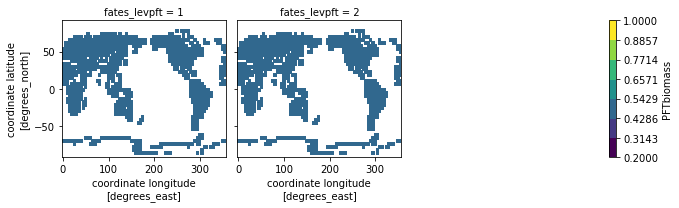

In [15]:
plt.rcParams['figure.figsize'] = [15, 15]
PFTbiomass = ds8.PFTbiomass[0,0:3,:,:]
sumB=np.sum(PFTbiomass,0)
normB = PFTbiomass/sumB
plot = normB.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3, levels=8, vmin=0.2 , vmax = 1.0)
#plt.tight_layout()

So, maybe there are new recruits which are arriving 'under the radar' and have a cohort status with leaves_on?  

This is where cohortstatus gets defined in recruitment:
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L1535

But this seems like it -should- be set to 'leaves_off' if we are in a 'nevercold' regime:
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDPhysiologyMod.F90#L1359

But what I don't understand is what happens with the new cohorts in PARTEH, particularly with regard to if and how parteh uses the status of the leaves during initialization?
https://github.com/NGEET/fates/blob/3f6749d471e8766a212dd0a2b0c4c95aacd97f65/biogeochem/EDCohortDynamicsMod.F90#L240

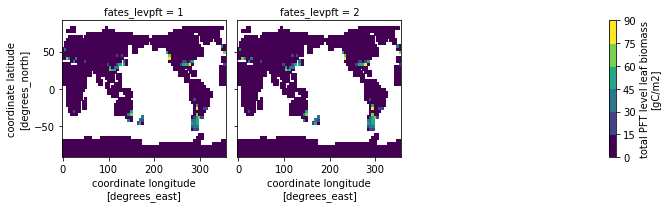

In [16]:
plt.rcParams['figure.figsize'] = [15, 15]
t=ds8.TLAI.sizes['time']-1
PFTleafbiomass = ds8.PFTleafbiomass[t,:,:,:]
plot = PFTleafbiomass.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3, levels=8)

Here we look at the 'leaf off' event in more detail. Noting that the majority of places don't go to zero. 

(695, 710)

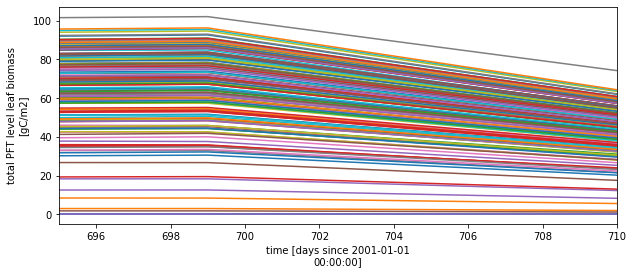

In [17]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.PFTleafbiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(x='time',add_legend=False)
plt.title('')
plt.xlim(695,710)

Zooming out a bit more...

(650, 1250)

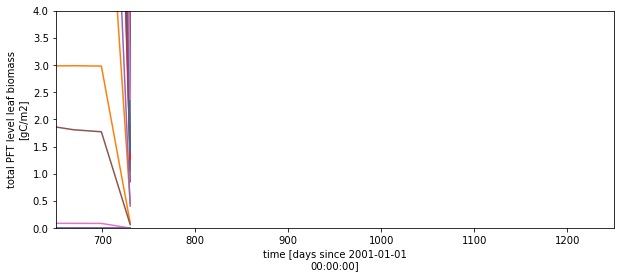

In [18]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.PFTleafbiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(x='time',add_legend=False)
plt.title('')
plt.ylim(0,4)
plt.xlim((650,1250))

Does it look the same for LAI?

(650, 1250)

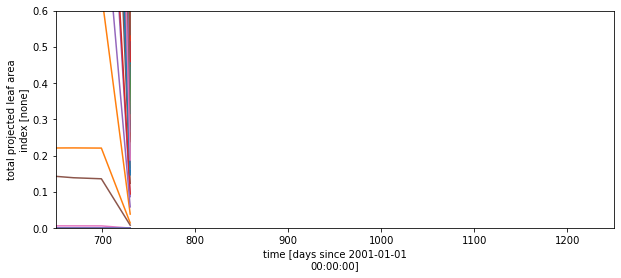

In [19]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.TLAI.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)
plt.title('')
plt.ylim(0,0.6)
plt.xlim(650,1250)

This made me feel like maybe the leaves weren't coming off entirely, but the 'fraction_leaf_drop' parameter does appear to be set to 1.0

https://github.com/NGEET/fates/blob/393b905468d93786735a340356d48babc3769988/biogeochem/EDPhysiologyMod.F90#L909

This is where the PRT function 'PRTDeciduousTurnover' is called that makes the leaves come off
https://github.com/NGEET/fates/blob/393b905468d93786735a340356d48babc3769988/biogeochem/EDPhysiologyMod.F90#L973

----
But why the sudden uptick in growth after these arbitrary off periods?

Here, we see that NPP is negative for many of these points in the first period after leaf loss, but it is gradually recovering. Why? Is it because the pool sizes for respiration are shrinking?

(650, 1250)

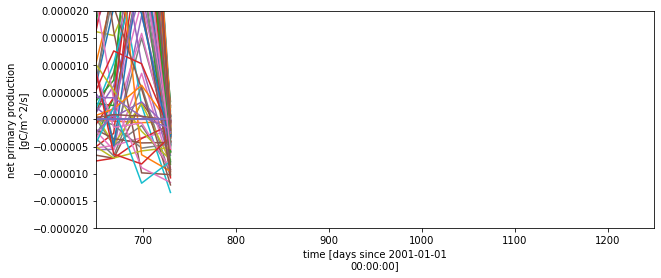

In [20]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.NPP.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)
plt.title('')
plt.ylim(-0.00002,0.00002)
plt.xlim(650,1250)

GPP is more or less constant

(650, 1250)

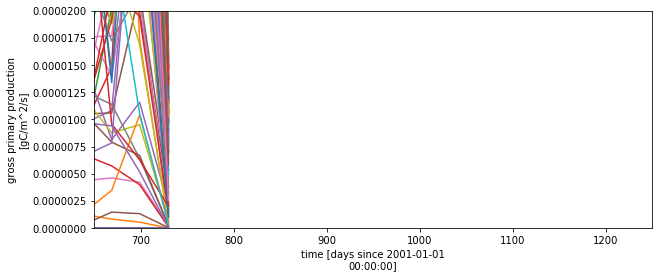

In [21]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.GPP.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)
plt.title('')
plt.ylim(-0.0000,0.00002)
plt.xlim(650,1250)

but AR canopy is declining

(650, 1250)

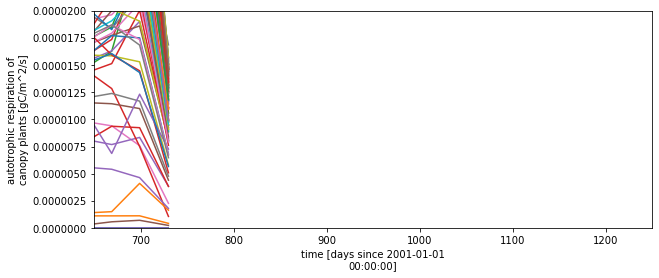

In [22]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.AR_CANOPY.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)
plt.title('')
plt.ylim(-0.0000,0.00002)
plt.xlim(650,1250)

What is going on with the understorey? Is there an understorey? (yes, but not a lot)

(650, 1250)

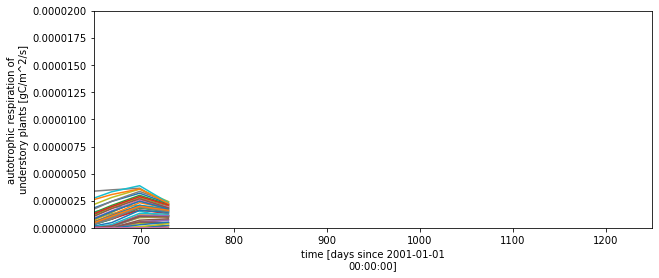

In [23]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.AR_UNDERSTORY.isel(lat=l,  lon=lons).plot.line(x='time',add_legend=False)
plt.title('')
plt.ylim(-0.0000,0.00002)
plt.xlim(650,1250)

Most respiration is maintenance...

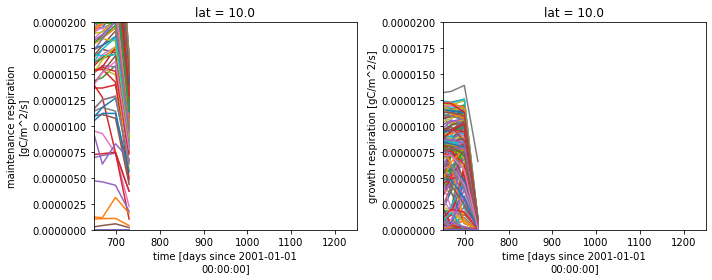

In [24]:
plt.rcParams['figure.figsize'] = [10, 4]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
for l in lats:
   ds8.MAINT_RESP.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, xlim=(650,1250),  ylim=(0,0.00002))
   ds8.GROWTH_RESP.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, xlim=(650,1250), ylim=(0,0.00002))
plt.tight_layout()

It is the root biomass that is declining...

MR tissue fluxes are randomly per year not per second...

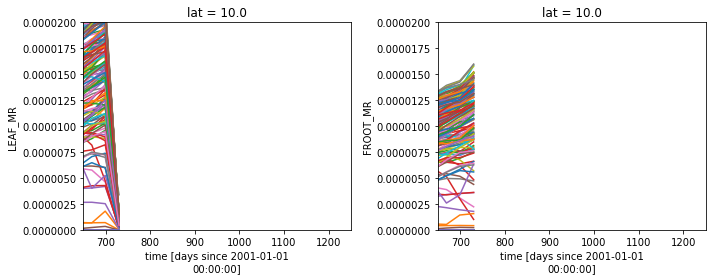

In [25]:
plt.rcParams['figure.figsize'] = [10, 4]
spy=3600*23*365/1000
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
for l in lats:
   np.divide(ds8.LEAF_MR.isel(lat=l,  lon=lons),spy).plot.line(ax=ax0,x='time',add_legend=False, xlim=(650,1250), ylim=(0,0.00002))
   np.divide(ds8.FROOT_MR.isel(lat=l, lon=lons),spy).plot.line(ax=ax1,x='time',add_legend=False, xlim=(650,1250), ylim=(0,0.00002))
plt.tight_layout()

So from all that I think the sudden uptick makes sense. We have negative NPP, and thus no growth, and then the gradual decline in root N while leaves are off evnetually allows NPP to come back to eing positive again, whereupon the leaf biomass starts to go up, and the LAI/GPP feedback kicks in. Just one last look at stored carbon before we move on

(698, 710)

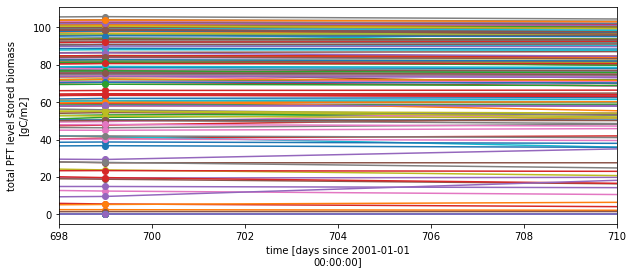

In [26]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.PFTstorebiomass.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(x='time',add_legend=False, marker='o')
plt.title('')
#plt.ylim(0,4)
plt.xlim(698,710)

Back to the reasons why LAI doesn't go to zero after leaf drop. This is the line in PARTEH which removes the carbon from the leaf pool. This all appears to be well (some drops, some gets retranslocated, it should all add up to 1.0 (the mass fraction previously passed in). 

https://github.com/NGEET/fates/blob/393b905468d93786735a340356d48babc3769988/parteh/PRTLossFluxesMod.F90#L547
    

---------

So further possibilities include:

1) some of the cohorts do not pass through this leaf drop code - are they recruited or split after it happens? 

2) New recruits don't get the 'neverzero' flag and are initialized with some small leaf biomass? 


Look at the number of individuals. Is there still recruitment? It doesn't seem like it. and notably, this line should be and appears to be setting seed germination flux to zero

https://github.com/NGEET/fates/blob/393b905468d93786735a340356d48babc3769988/biogeochem/EDPhysiologyMod.F90#L1264


(650, 1250)

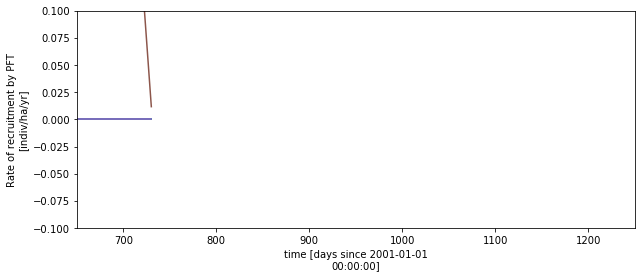

In [27]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.RECRUITMENT.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(x='time',add_legend=False)
plt.title('')
plt.ylim(-0.1,0.1)
plt.xlim(650,1250)

And thus the number of individuals is going down

(650, 1250)

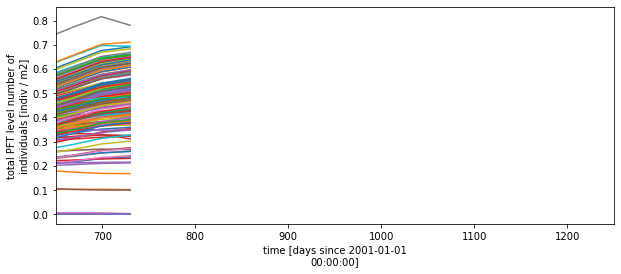

In [28]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
for l in lats:
   ds8.PFTnindivs.isel(lat=l,  lon=lons, fates_levpft=1).plot.line(x='time',add_legend=False)
plt.title('')
plt.xlim(650,1250)

So if there is no recruitment after the onset of nevercold, then the small amount of LAI must be resident in some of the preexisting cohorts. 

Look here at the biomass of the canopy and understorey plants. This appears to show that the rebounding is primarily in the understorey plants...

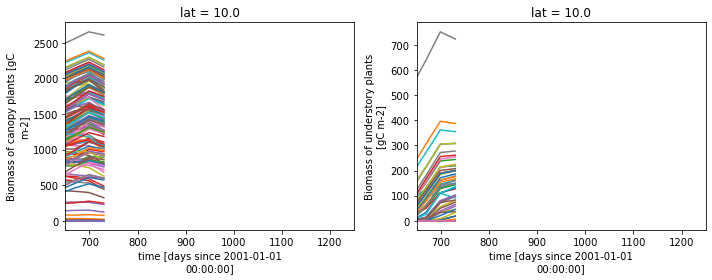

In [29]:
plt.rcParams['figure.figsize'] = [10, 4]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
for l in lats:
   ds8.BIOMASS_CANOPY.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, xlim=(650,1250)  )
   ds8.BIOMASS_UNDERSTORY.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, xlim=(650,1250))
plt.tight_layout() 

But if you plot a regression of the canopy/understorey biomass vs the total leaf biomass, the canopy seems more dominant

In [30]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
tm=range(100,365)
for l in lats:
   plt.scatter(ds8.BIOMASS_UNDERSTORY.isel(time=tm,lat=l,  lon=lons), ds8.PFTleafbiomass.isel(time=tm,lat=l,  lon=lons, fates_levpft=1))

IndexError: index 100 is out of bounds for axis 0 with size 12

In [ ]:
plt.rcParams['figure.figsize'] = [10, 4]
lats=range(19, 26)
lons=range(1, 72)
tm=range(100,365)
for l in lats:
   plt.scatter(ds8.BIOMASS_CANOPY.isel(time=tm, lat=l,  lon=lons), ds8.PFTleafbiomass.isel(time=tm,lat=l,  lon=lons, fates_levpft=1))

In [ ]:
print(ds8.BIOMASS_CANOPY)